In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
def seqSearch(name, popNames):
    for i in range(0,len(popNames)):
        if name == popNames[i]:
            return i
    return -1
arrests = pd.read_csv('arrests.csv')
pop = pd.read_csv('total-population.csv')[['Neighborhood','Estimate; Total']]#.groupby('Neighborhood').max()
popNums=pop['Estimate; Total'].to_list()
popNames=pop['Neighborhood'].to_list()
#print(popNums)
arrests=arrests.groupby('INCIDENTNEIGHBORHOOD').size()
arrestsdict=arrests.to_dict()
arrNums = list(arrestsdict.values())
arrNames = list(arrestsdict.keys())
perCapita=[]
perNames=[]
#print(arrNames)
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(arrNames[i], popNames)
    if index != -1:
        #print("Neighborhood: " + arrNames[i]+ " arrests: " + str(arrNums[i]) + " pop: " + str(popNums[index]))
        perCapita.append(arrNums[i]/popNums[index])
        perNames.append(arrNames[i])
        perCapita[count]*=1000
        perCapita[count] = round(perCapita[count], 3)
        count+=1
#print(perCapita)
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
#print(perCapDict)
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
arrestFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Arrests Per 1000 People'])
arrestFramed = arrestFrame.groupby('Neighborhood').max().sort_values('Arrests Per 1000 People',ascending=True)
perCapNames=list(perCapDict.keys())
safetyScoreDict={}
for i in range(0, len(perCapita)):
    safetyScoreDict[perCapNames[i]]=len(perCapita)-i
#print(perCapDict)
#print(arrNums)

income = pd.read_csv('aggregate-household-income.csv')#[['Neighborhood','Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars']]
incomeNumsString=income['Estimate'].to_list()
incomeNums=[]
for num in incomeNumsString:
    incomeNums.append(float(num))
incomeNames=income['Neighborhood'].to_list()
perCapita=[]
perNames=[]
#income.sample(10)
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(incomeNames[i], popNames)
    if index != -1:
        #print("Neighborhood: " + arrNames[i]+ " arrests: " + str(arrNums[i]) + " pop: " + str(popNums[index]))
        perCapita.append(float(int(incomeNums[i]/popNums[index])))
        perNames.append(incomeNames[i])
        count+=1
#print(perCapita)
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
#print(perCapDict)
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
rentFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Average Household Income'])
perCapNames=list(perCapDict.keys())
rentScoreDict={}
for i in range(0, len(perCapita)):
    rentScoreDict[perCapNames[i]]=len(perCapita)-i
#print(perCapDict)

fires = pd.read_csv('fire-incidents.csv')
fires_by_neighborhood = fires.groupby('neighborhood').size().sort_values(ascending=False)

firedict=fires_by_neighborhood.to_dict()
fireNums = list(firedict.values())
fireNames = list(firedict.keys())
perCapita=[]
perNames=[]
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(fireNames[i], popNames)
    if index != -1:
        perCapita.append(fireNums[i]/popNums[index])
        perNames.append(fireNames[i])
        perCapita[count]*=1000
        perCapita[count] = round(perCapita[count], 3)
        count+=1
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
#print(perCapDict)
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
fireFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Fires Per 1000 People'])
fireFramed = fireFrame.groupby('Neighborhood').max().sort_values('Fires Per 1000 People',ascending=True)
perCapNames=list(perCapDict.keys())
for i in range(0, len(perCapita)):
    if perCapNames[i] not in safetyScoreDict:
        safetyScoreDict[perCapNames[i]]=len(perCapita)-i
    else:
        safetyScoreDict[perCapNames[i]]+=len(perCapita)-i


for name in safetyScoreDict:
    safetyScoreDict[name]/=2
#print(safetyScoreDict)
names=[]
overallScoreDict={}
for name in safetyScoreDict:
    names.append(name)
    if name not in rentScoreDict:
        overallScoreDict[name]=safetyScoreDict[name]
    else:
        overallScoreDict[name]=safetyScoreDict[name]+rentScoreDict[name]
#print(names)
overallScoreDict=OrderedDict(sorted(overallScoreDict.items(), key=lambda x: x[1]))
overallScore = pd.DataFrame(list(overallScoreDict.items()),columns = ['Neighborhood','Overall Score'])
overallScore = overallScore.groupby('Neighborhood').max().sort_values('Overall Score',ascending=False)
overallScore.head(20)

,Overall Score
Neighborhood,
North Oakland,160.0
Central Oakland,150.0
Bluff,140.0
Terrace Village,131.0
Glen Hazel,130.5
Marshall-Shadeland,129.0
Oakwood,120.0
Morningside,116.0
Bedford Dwellings,115.5


<AxesSubplot:xlabel='Neighborhood'>

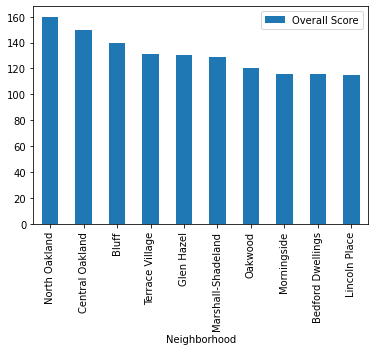

In [63]:
overallScore.head(10).plot.bar()

76

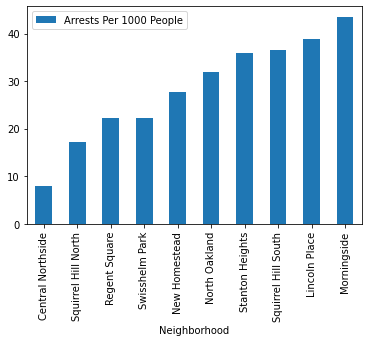

In [17]:
arrestFramed.head(10).plot.bar()
#seqSearch(arrNames[i], popNames)

In [62]:
arrestFramed.tail(10)

,Arrests Per 1000 People
Neighborhood,
Strip District,468.541
Fineview,517.323
Allegheny Center,611.623
Homewood West,667.059
Homewood South,677.504
Central Business District,705.911
East Allegheny,750.835
North Shore,2721.951
South Shore,17333.333


<AxesSubplot:xlabel='neighborhood'>

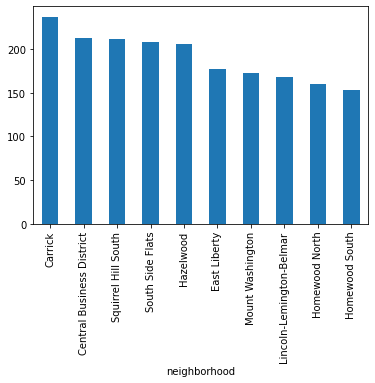

In [27]:
fires_by_neighborhood.head(10).plot.bar()
#ten neighborhoods with most fire incidents

<AxesSubplot:xlabel='Neighborhood'>

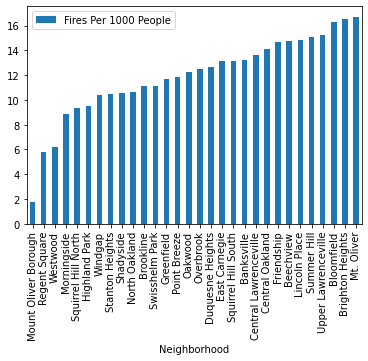

In [42]:
fireFramed.head(30).plot.bar()

<AxesSubplot:xlabel='neighborhood'>

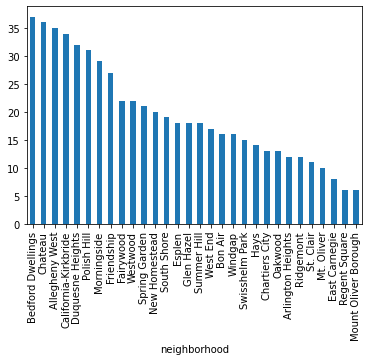

In [34]:
#shows trend of 30 neighborhoods with highest amount of fire incidents
fires_by_neighborhood.tail(30).plot.bar()

In [31]:
fires_by_neighborhood.describe()

count     91.000000
mean      74.197802
std       57.272491
min        6.000000
25%       28.000000
50%       56.000000
75%      106.500000
max      237.000000
dtype: float64